## Observations and Insights 

In [257]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
comnine_data =pd.merge(mouse_metadata, study_results,  on="Mouse ID",how="left")
# Display the data table for preview
comnine_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [258]:
# Checking the number of mice.

mice_count= len(comnine_data["Mouse ID"])

print(f"There are {mice_count} mice" )


There are 1893 mice


In [259]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice_id=comnine_data["Mouse ID"].duplicated()

duplicate_mice_timepoint=comnine_data["Timepoint"].duplicated()



In [260]:
# Optional: Get all the data for the duplicate mouse ID. 

duplicate_mouse=comnine_data[comnine_data["Mouse ID"].duplicated()]

duplicate_mouse.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1


In [261]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data=comnine_data.drop_duplicates(subset=["Mouse ID"])


clean_data


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.0,0
10,s185,Capomulin,Female,3,17,0,45.0,0
20,x401,Capomulin,Female,16,15,0,45.0,0
30,m601,Capomulin,Male,22,17,0,45.0,0
40,g791,Ramicane,Male,11,16,0,45.0,0
...,...,...,...,...,...,...,...,...
1858,z314,Stelasyn,Female,21,28,0,45.0,0
1860,z435,Propriva,Female,12,26,0,45.0,0
1863,z581,Infubinol,Female,24,25,0,45.0,0
1873,z795,Naftisol,Female,13,29,0,45.0,0


In [262]:
# Checking the number of mice in the clean DataFrame.

mice_count= len((clean_data["Mouse ID"]).unique())

print(f"There are {mice_count} mice" )


There are 249 mice


## Summary Statistics

In [263]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

summary_data=comnine_data.groupby("Drug Regimen")

mean=summary_data.mean()["Tumor Volume (mm3)"]

median=summary_data.median()["Tumor Volume (mm3)"]

variance = summary_data.var()["Tumor Volume (mm3)"]

s_d=summary_data.std()["Tumor Volume (mm3)"]

sems=summary_data.sem()["Tumor Volume (mm3)"]

summary=pd.DataFrame(mean)

summary_table=summary.rename(columns={"Tumor Volume (mm3)":"Mean"})

summary_table["Median"]= median
summary_table["Variance"]= variance
summary_table["Standard Deviation"]= s_d
summary_table["SEM"]= sems

summary_table
# This method is the most straighforward, creating multiple series and putting them all together at the end.



,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [264]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function
easy_summary = comnine_data.groupby('Drug Regimen')
easy = easy_summary.agg(['mean','median','var','std','sem'])["Tumor Volume (mm3)"]
easy

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

Text(0.5, 1.0, 'Number of Time Drug Tested')

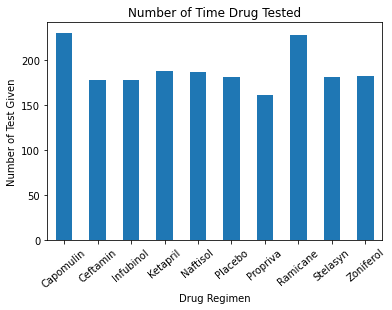

In [265]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
mouse_trement=comnine_data.groupby('Drug Regimen').count()['Tumor Volume (mm3)']
#convert to pandas
pandas= pd.DataFrame(mouse_trement)
#creat bar for data
bar= pandas.plot.bar(legend=False,rot=40)
bar
plt.ylabel("Number of Test Given")
plt.title("Number of Time Drug Tested")


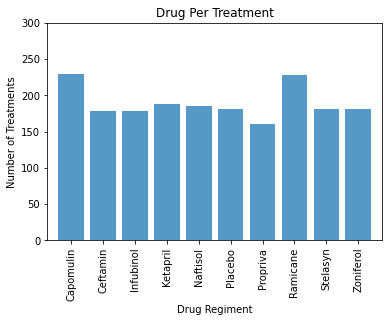

In [266]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
#creat and x_axis
x_axis=np.arange(len(mouse_trement))
#creat a ticker
ticker= [x for x in x_axis]
#plot bar size
plt.figure(figsize=(6,4))
#new pandas(reset) 
newpandas = pandas.reset_index()
newpandas
#plot bar points
plt.bar(x_axis,newpandas["Tumor Volume (mm3)"], alpha=0.75,align= "center")

#plot bar Ticker
plt.xticks(ticker, newpandas['Drug Regimen'], rotation= "vertical")

#set x & y limits 
plt.xlim(-0.75, len(mouse_trement)-.25)

plt.ylim(0, 300)

#set lables

plt.title("Drug Per Treatment")
plt.xlabel("Drug Regiment")
plt.ylabel("Number of Treatments")

#show bar

plt.show()



<ipython-input-267-e3e76b745a23>:18: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  plt.pie(gender_count, labels=lable, colors=colors, autopct="%1.1f%%", shadow=True, startangle=180)


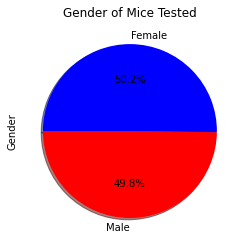

In [267]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

# get gender 
genders=mouse_metadata.groupby("Sex").count()

#get gender lables 
lable=comnine_data["Sex"].unique()

#get gender count 

gender_count= [genders["Mouse ID"]]

#chose colors 
colors= ["red","blue"]

#plot pie size 

plt.pie(gender_count, labels=lable, colors=colors, autopct="%1.1f%%", shadow=True, startangle=180)

#lable pie 

plt.title("Gender of Mice Tested")
plt.ylabel("Gender")

#show pie
plt.show()

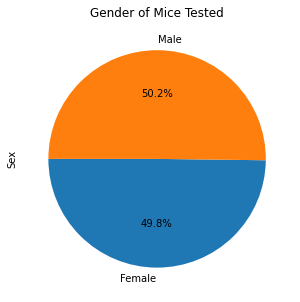

In [268]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
#plot pie
pyplot_pie= genders["Mouse ID"].plot.pie(y='gender_count', figsize=(5,5),autopct="%1.1f%%",startangle=180)

#lable pie 
plt.title("Gender of Mice Tested")
plt.ylabel("Sex")

#show Pie 
plt.show()


## Quartiles, Outliers and Boxplots

In [288]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
cominded=comnine_data[comnine_data["Drug Regimen"].isin(["Capomulin","Ramicane","Infubinol","Ceftamin"])]


# Start by getting the last (greatest) timepoint for each mouse

regimes = cominded.sort_values(["Timepoint"], ascending=True)


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint

regimes_data = regimes[["Drug Regimen", "Mouse ID", "Timepoint", "Tumor Volume (mm3)"]]
regimes_data.head()

,Drug Regimen,Mouse ID,Timepoint,Tumor Volume (mm3)
0,Ramicane,k403,0,45.0
1391,Infubinol,q132,0,45.0
195,Capomulin,i738,0,45.0
205,Ramicane,a520,0,45.0
1370,Ceftamin,p438,0,45.0


In [275]:
# Put treatments into a list for for loop (and later for plot labels)
# Create empty list to fill with tumor vol data (for plotting)
lable=[]
for lables in [merg["Drug Regimen"]]:
        lable.append(lables)
        

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

tumors3 = merg["Tumor Volume (mm3)"]

quartiles3 = tumors3.quantile([.25,.5,.75])
lowerq3 = quartiles3[0.25]
upperq3 = quartiles3[0.75]
iqr3 = upperq3-lowerq3

    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
lower_bound3 = lowerq3 - (1.5*iqr3)
upper_bound3 = upperq3 + (1.5*iqr3)

In [282]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
data_to_plot = tumors3.all()

fig1, ax1 = plt.subplots()
ax1.set_title('Tumors')
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.set_xlabel('Drug Regimen')

ax1.boxplot(data_to_plot, labels=lable)
plt.show()


ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

<Figure size 432x288 with 1 Axes>

## Line and Scatter Plots

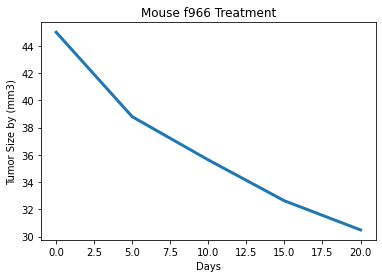

In [120]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

lucky_mouse = capomulin.loc[capomulin["Mouse ID"] == "f966",:]
lucky_mouse.head()
x_axis_days= lucky_mouse["Timepoint"]
tumor_size=lucky_mouse['Tumor Volume (mm3)']

plt.title("Mouse f966 Treatment")
plt.plot(x_axis_days,tumor_size, linewidth=3)
plt.xlabel("Days")
plt.ylabel("Tumor Size by (mm3)")
plt.show()


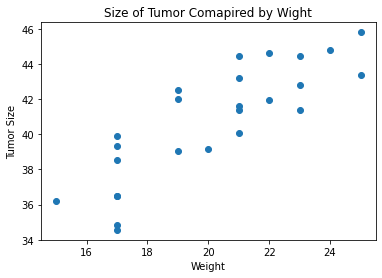

In [132]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
mice_=capomulin.groupby(["Mouse ID"]).mean()

plt.scatter(mice_["Weight (g)"],mice_["Tumor Volume (mm3)"])

plt.xlabel("Weight")
plt.ylabel("Tumor Size")
plt.title("Size of Tumor Comapired by Wight")

plt.show()


## Correlation and Regression

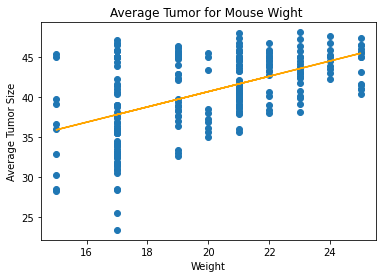

In [131]:
# Calculate the correlation coefficient 

correlation=round(st.pearsonr(capomulin['Weight (g)'],capomulin['Tumor Volume (mm3)'])[0],2)


#linear regression model 


linear=st.linregress(capomulin['Weight (g)'],capomulin['Tumor Volume (mm3)'])

slope=0.9609669432428376

intercept=21.48982721329951


# for mouse weight and average tumor volume for the Capomulin regimen

values= capomulin["Weight (g)"]*slope+intercept
plt.scatter(capomulin['Weight (g)'], capomulin["Tumor Volume (mm3)"])
plt.plot(capomulin['Weight (g)'], values,color="orange")

plt.xlabel("Weight") 
plt.ylabel("Average Tumor Size")
plt.title("Average Tumor for Mouse Wight ")

plt.show()